# F: Integración de imagenes en color

Las imágenes `RGB`/`SHO` se pueden producir utilizando la capacidad de `matplotlib` para crear imágenes de tres colores. En general, una imagen `RGB` es una matriz $ N\times M \times 3 $, donde $N$ es la dimensión $x$ y $M$ es la dimensión $y$. 

El 3 representa que hay tres canales, el <span style="color:red">rojo</span>, el <span style="color:green">verde</span> y el <span style="color:blue">azul</span>, respectivamente. Se puede especificar una cuarta capa que representa el valor *alfa* ($\alpha$-channel) o transparencia (no confundir con las imágenes en filtro $ha$). Se puede consultar algo más sobre [espacios de color en la Wikipedia](https://es.wikipedia.org/wiki/Espacio_de_color).

Las imágenes a color por una cámara normalmente vienen a partir de una matriz de fotosensores (para cada píxel) con filtros de distinto color formando una [matriz o mosaico  de Bayer](https://es.wikipedia.org/wiki/Mosaico_de_Bayer).

`Matplotlib` tiene varias herramientas para manipular imágenes en color en [matplotlib.colors](https://matplotlib.org/stable/api/colors_api.html#module-matplotlib.colors).

Las herramientas de visualización de `Astropy` se pueden utilizar para estirar la imagen y escalar las capas individuales (`R`, `G` y `B`) de la imagen `RGB`. Cada capa debe estar en una escala de `0.0` a `1.0` para `floats` (o de `0` a `255` para números enteros). Los valores que see encuentren fuera de este rango serán recortados.

[Lupton et al. (2004)](https://ui.adsabs.harvard.edu/abs/2004PASP..116..133L/abstract) describe un algoritmo "óptimo" para producir imágenes compuestas por los canales `RGB` a partir de tres matrices independientes. Este método se implementa como una funcion de astropy a traves de `make_lupton_rgb`.

Además haremos uso de algunas funciones de la biblioteca `OpenCV` (una biblioteca de visión por computadora), que debemos instalar. Ojo, la instalación tardará un buen rato y tendrá que descargar *muchos* paquetes:

```
> conda install -c conda-forge opencv
```

## Imagen virtual

Creamos una imagen virtual de 100x100 pixeles con valores aleatorios para los tres canales `RGB`.

Aplicamos la funcion [`make_lupton_rgb`](https://docs.astropy.org/en/stable/api/astropy.visualization.make_lupton_rgb.html) para obtener la imagen RGB.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb

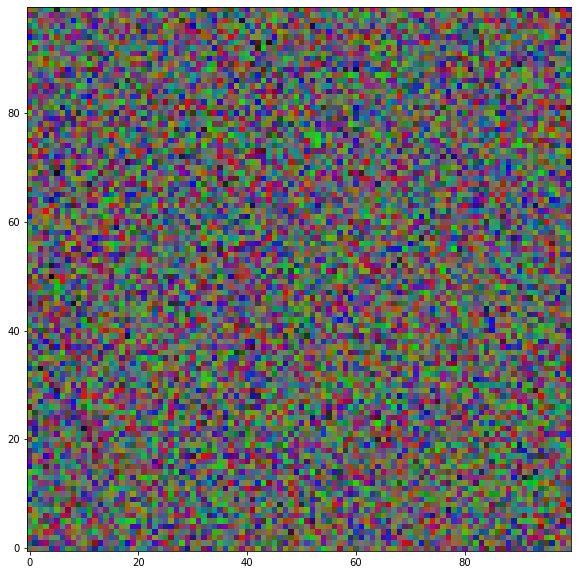

In [2]:
plt.figure(figsize=(10, 10))
image_r = np.random.random((100,100))
image_g = np.random.random((100,100))
image_b = np.random.random((100,100))
image = make_lupton_rgb(image_r, image_g, image_b, stretch=0.5)
plt.imshow(image, origin = 'lower')

### Estructura interna de la imagen en color

Una imagen en color, a diferencia de una imagen monocroma, tiene 3 canales y, por lo tanto, tiene 3 valores asociados a esos canales.

In [3]:
image

array([[[ 90, 120,  80],
        [148, 103,  70],
        [ 98, 124, 118],
        ...,
        [154, 131,  25],
        [124, 105, 111],
        [ 85, 111, 117]],

       [[ 57,  91, 113],
        [  5,  54, 118],
        [111,  10, 158],
        ...,
        [ 85, 157,  57],
        [142,  28, 138],
        [140, 133,  54]],

       [[189,  36,  36],
        [ 37,  69, 178],
        [151, 113,  54],
        ...,
        [239,   6,   7],
        [133,  78,  73],
        [158,  69,  57]],

       ...,

       [[111, 156,  38],
        [ 46, 125, 132],
        [190,  40,  32],
        ...,
        [ 95, 137, 107],
        [ 81,  74, 158],
        [ 29,  29, 146]],

       [[143,  20, 148],
        [ 68,  66,  68],
        [ 94, 128, 122],
        ...,
        [140, 155,  26],
        [190,  42,   2],
        [176,  64,  43]],

       [[171,  98,  29],
        [101, 128,  43],
        [ 80,  91, 125],
        ...,
        [ 84,  38,  28],
        [189,  22,  72],
        [ 33,  37, 193]]

Para comprobar que valores hay en un canal concreto debo de buscar en la matriz los pixeles que quiero y luego el canal normalmente ordenado en `RGB` (`0` - rojo, `1` - verde, `2`- azul):

In [4]:
image[0:10, 0:10, 0] # [pixel_inicial_y:pixel_final_y, pixel_inicial_x: pixel_final_x, canal] 
                     #canal rojo

array([[ 90, 148,  98, 123,   1, 160,   4,  87,  39,  80],
       [ 57,   5, 111, 167,  42, 116,  75, 102, 154, 116],
       [189,  37, 151, 118, 109,  68,  36, 159, 125, 127],
       [ 11, 154, 114, 202, 182,  68, 111, 153, 151, 111],
       [ 98,  43, 122,  55, 151, 207,  62, 165, 153, 107],
       [105,  52, 132,  52,  90, 128,  11, 107,  60,  20],
       [ 83, 157,  71, 146, 130,   2, 199, 148,  99, 109],
       [201, 136,  30,  70,  32, 100, 110, 142, 103,  47],
       [ 90,  37,  44,  64,  42, 126, 100, 170, 158,   8],
       [ 16,  90,  59, 118, 122,   6,  76,  43, 182, 117]], dtype=uint8)

In [5]:
image[0:10, 0:10, 1] #canal verde

array([[120, 103, 124, 108,  69,   4, 114, 149, 147,  84],
       [ 91,  54,  10,   5, 104,  73,  94,  12,  28, 120],
       [ 36,  69, 113,  88, 138, 153,  59,  37, 143,  74],
       [201,  87, 144,  17,  48,  57,  53,  79, 104, 138],
       [123, 154, 115, 185,  22,   9, 135,  28, 131, 166],
       [105, 188,  42,  75,  62,   0, 176, 157, 111, 194],
       [147, 138, 144,  11,  76, 119,   5,  26, 123,  96],
       [ 19, 136, 143, 160, 127, 178, 120,   1, 124, 108],
       [141, 134, 114,  79,  91, 123,  45,  64,  36,  82],
       [ 10, 128,  64,  80,  27, 163, 108, 114,   5,  67]], dtype=uint8)

In [6]:
image[0:10, 0:10, 2] #canal azul

array([[ 80,  70, 118,  89, 164, 131, 172,  35,  78,  96],
       [113, 118, 158,  91,  99, 121, 101, 177,  87, 100],
       [ 36, 178,  54, 134,  80,  91, 172,  84,  53, 134],
       [ 54,  38,  13,  61,  57, 162, 127,  49,  26,  60],
       [114,  68,  27,  42,  69,  51, 137, 119,  38,  33],
       [ 96,  40,  96,  74, 148, 136,  28,  31, 124,   8],
       [ 87,   1, 108,  85,  81, 147,  76,  83, 122, 119],
       [ 15,  70, 117,  82, 155,  12,  76,  64, 104, 117],
       [ 85, 126, 132, 146,  51,  46, 115,  46,  30,  15],
       [216,  49, 158, 137, 159,  54,  91,  59,  71, 129]], dtype=uint8)

Podemos cambiar los valores de un canal concreto a partir de cualquier operacion matemática:

In [7]:
canal = 1 # Canal que quiero cambiar. En nuestro caso hemos seleccionando el canal verde
len_y, len_x, color = np.shape(image) # Averiguando las dimensiones de mi imagen

image[:,:,canal] = image[:,:,canal]/1.5 # voy subiendo en y hasta completar toda la imagen

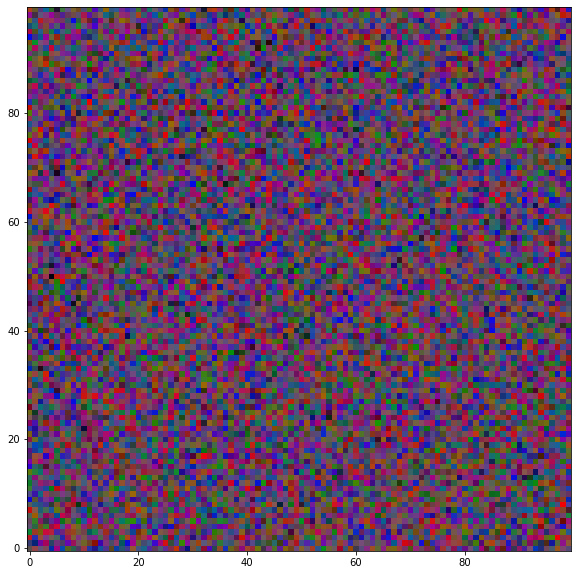

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(image, origin = 'lower')

## Ejemplos con imágenes reales

### Grupo Hickson 88, SDSS

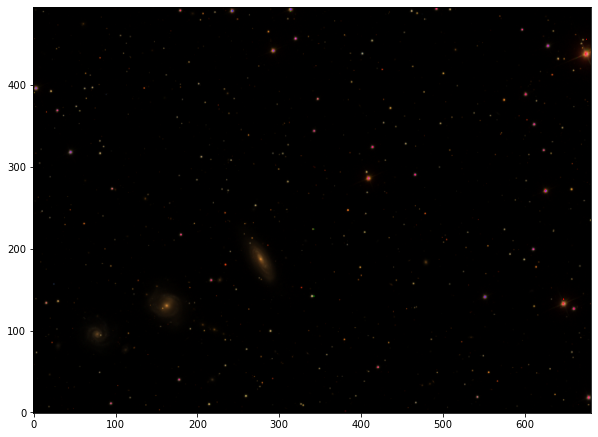

In [9]:
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

# Lee las tres imágenes descargadas desde aquí:
g_name = get_pkg_data_filename('visualization/reprojected_sdss_g.fits.bz2')
r_name = get_pkg_data_filename('visualization/reprojected_sdss_r.fits.bz2')
i_name = get_pkg_data_filename('visualization/reprojected_sdss_i.fits.bz2')

g = fits.open(g_name)[0].data
r = fits.open(r_name)[0].data
i = fits.open(i_name)[0].data
plt.figure(figsize=(10, 10))
rgb_default = make_lupton_rgb(i, r, g, filename="salidas/ngc6976-default.jpg")
plt.imshow(rgb_default, origin='lower')
plt.show()

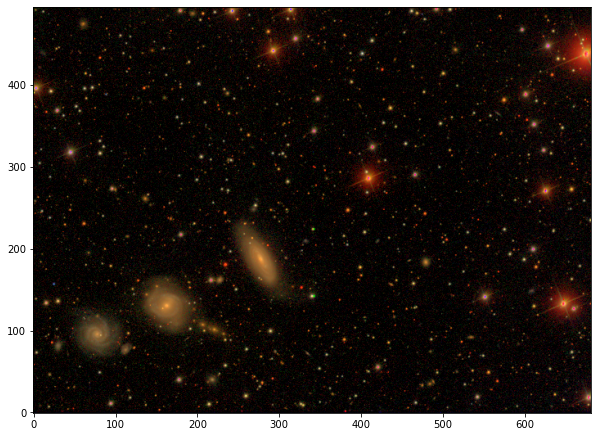

In [10]:
plt.figure(figsize=(10, 10))
rgb = make_lupton_rgb(i, r, g, Q=12, stretch=0.2, filename="salidas/ngc6976.jpeg")
plt.imshow(rgb, origin='lower')
plt.show()

### Pilares de la creación, Hubble

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import make_lupton_rgb

forc=np.float_()
r=fits.open("imagenes/eagle/673nmos.fits")[0].data
g=fits.open("imagenes/eagle/656nmos.fits")[0].data
b=fits.open("imagenes/eagle/502nmos.fits")[0].data

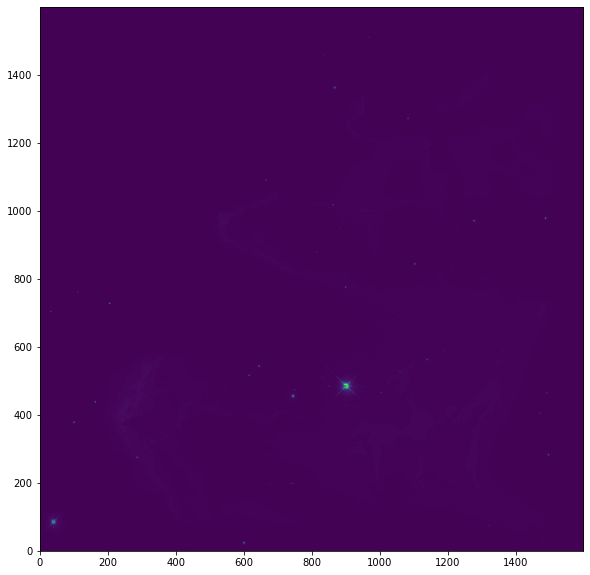

In [12]:
plt.figure(figsize=(10, 10))
rgb_default = make_lupton_rgb(r,g,b,Q=1,stretch=100,filename="salidas/pilar.jpg")
plt.imshow(r, origin='lower')
plt.show()

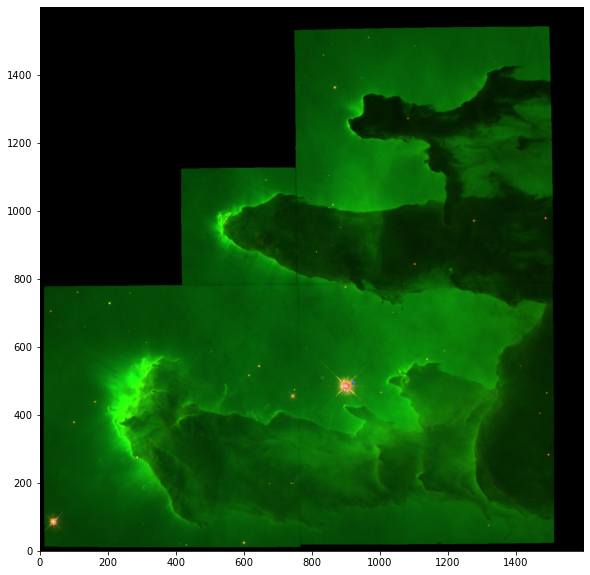

In [13]:
plt.figure(figsize=(10, 10))
rgb_default = make_lupton_rgb(r,g,b,Q=0.001,stretch=300,filename="salidas/pilar.jpg")
plt.imshow(rgb_default, origin='lower')
plt.show()

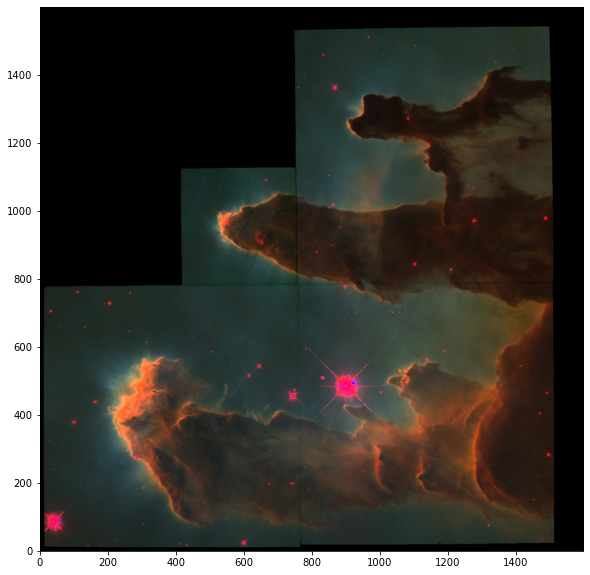

In [14]:
plt.figure(figsize=(10, 10))
rgb_default = make_lupton_rgb(r,g*0.1,b,Q=0.001,stretch=50,filename="salidas/pilar.jpg")
plt.imshow(rgb_default, origin='lower')
plt.show()

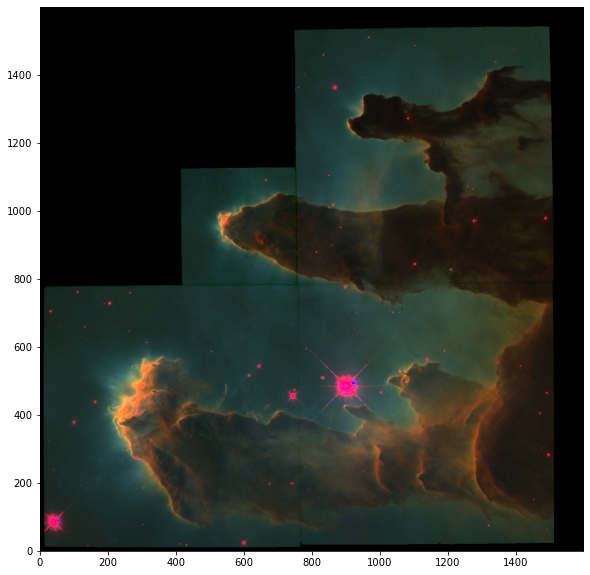

In [15]:
plt.figure(figsize=(10, 10))
rgb_default = make_lupton_rgb(r*0.8,g*0.1,b,Q=0.001,stretch=50,filename="salidas/pilar.jpg")
plt.imshow(rgb_default, origin='lower')
plt.show()

### Nebulosa de la Tarantula, SAG

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
from registrar import registra_lista, imprimir_info
from rotar import rotar_imagen
from trasladar import shift_image, desplazar_imagen
import cv2

r = fits.open("salidas/salidaCalibracion/sho/imagenFinal_Sii.fit")[0].data
g = fits.open("salidas/salidaCalibracion/sho/imagenFinal_H-alpha.fit")[0].data
g_header = fits.open("salidas/salidaCalibracion/sho/imagenFinal_H-alpha.fit")[0].header
b = fits.open("salidas/salidaCalibracion/sho/imagenFinal_Oiii.fit")[0].data

Tenemos que intentar alinear las imágenes para que las estrellas de cada canal coincidan. Como veremos las funciones `rotar_imagen` y `despazar_imagen` no funcionan como deberian.

In [17]:
rgb = [r, g, b]
rgb_rotado = rotar_imagen(rgb)
reg_desplazado = desplazar_imagen(rgb_rotado)

La imagen 1 está rotada -119 grados
La imagen 2 está rotada -28 grados
La imagen 1 se ha desplazado en (x, y) = (-839, -4588)
La imagen 2 se ha desplazado en (x, y) = (-88, -4387)


Tampoco parece funcionar la librería de `astroalign`

In [18]:
import astroalign as aa
registered_image, footprint = aa.register(r, g)#, fill_value=None, max_control_points=50, detection_sigma=5, min_area=5)

MaxIterError: List of matching triangles exhausted before an acceptable transformation was found

No obstante probamos a generar una imagen en falso color a través de los canales *H-alpha* *SII* y *OIII* creando una paleta `SHO`.

In [19]:
rgb_default = make_lupton_rgb(r, g, b,Q=1,stretch=3000,filename="salidas/shoTarantula.jpg")
#rgb_default = make_lupton_rgb(r, g, b, Q=0.001, stretch=1000,filename="salidas/shoTarantula.jpg")

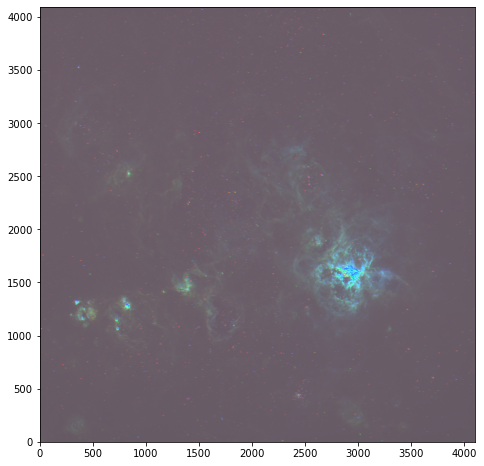

In [20]:
plt.figure(figsize=(8, 8))
plt.imshow(rgb_default, origin='lower')
plt.show()

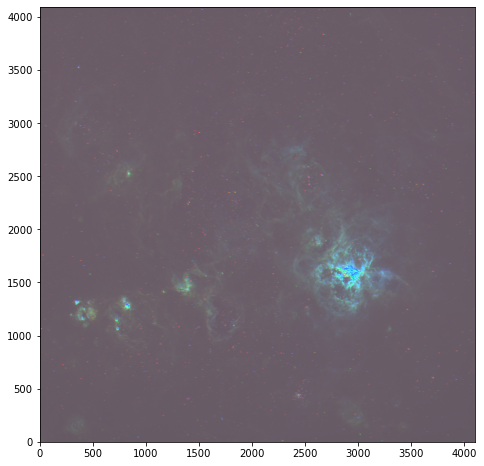

In [21]:
from astropy.visualization import simple_norm
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)
# Create interval object
interval = MinMaxInterval()
vmin, vmax = interval.get_limits(rgb_default)

# Create an ImageNormalize object using a SqrtStretch object
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())

plt.figure(figsize=(8, 8))
plt.imshow(rgb_default, origin='lower', norm=norm)
plt.show()

Podemos comprobar que las estrellas de los diferentes canales no han coincidido unas con otras. Mas tarde corregiremos este problema.

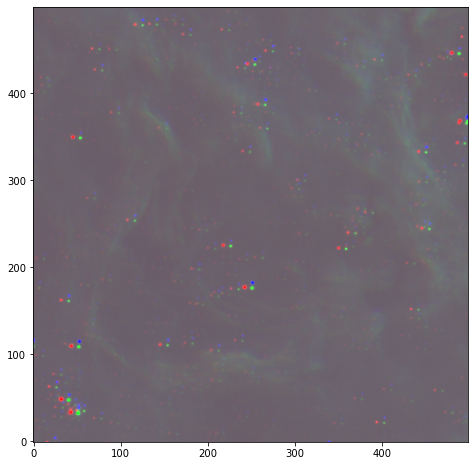

In [22]:
plt.figure(figsize=(8, 8))
plt.imshow(rgb_default[2000:2500,2000:2500], origin='lower', norm=norm)
plt.show()

#### *Image denoise*

Al igual que la reduccion de ruido se puede aplicar antes de generar la imagen `RGB`, también podemos reducir ruido después de generar dicha imagen aunque no es conveniente eliminar mucho ruido después del estirado que se genera al realizar la imagen en color.

Para la reducción de ruido usaremos el método [``fastNlMeansDenoisingColored``](https://docs.opencv.org/3.4/d1/d79/group__photo__denoise.html) de la biblioteca `OpenCV`

In [23]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

dst = cv2.fastNlMeansDenoisingColored(rgb_default,None,10,10,7,21)

Para normalizar la imagen y estirarla mejor podemos usar `MinMaxInterval` que determina los límites de los valores en función de los valores mínimo y máximo de la matriz de la imagen.

Los límites se pueden determinar llamando al método `.get_limits()` que toma la matriz de valores.

Por último creamos el objeto `ImageNormalize` que pasaremos a ``matplotlib``

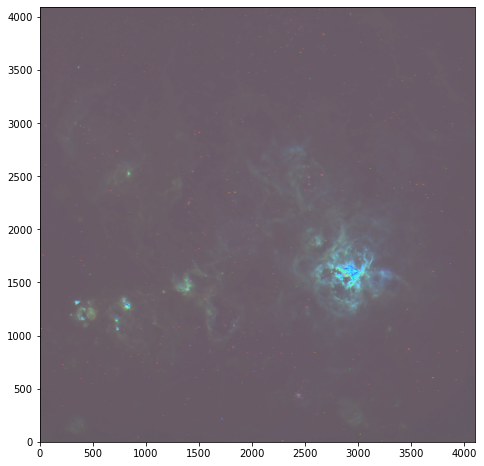

In [24]:
interval = MinMaxInterval()
vmin, vmax = interval.get_limits(dst)

# Create an ImageNormalize object using a SqrtStretch object
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())

plt.figure(figsize=(8, 8))
plt.imshow(dst, origin='lower', norm=norm)
plt.show()

Guardamos la imagen generada

In [25]:
SHO = fits.PrimaryHDU(data=dst.astype(np.float32), header = g_header)
SHO.writeto("salidas/salidaCalibracion/SHO.fit", overwrite=True)

## Localización de una imagen a traves de `WCS`

World Coordinate Systems (`WCS`) describen las transformaciones geométricas entre un conjunto de coordenadas y otro. Una aplicación común es mapear los píxeles de una imagen en la esfera celeste. Otra aplicación común es mapear los píxeles a la longitud de onda en un espectro.

`astropy.wcs` ([documentación](https://docs.astropy.org/en/stable/wcs/index.html)) contiene utilidades para gestionar las transformaciones del *World Coordinate Systems* (`WCS`) definidas en varias convenciones estándar `FITS`. Estas transformaciones funcionan tanto del píxel en la imagen a coordenadas como de coordenadas hacia el píxel en la imagen.

Para ello usaremos la función `WCS` de la biblioteca de `astropy`. A esta función debemos pasar la cabezera de la imagen que queramos sacar las coordenadas. ¡Atención! El programa de captura deberá haber anotado dicha información en la captura para poder obtener las coordenadas de la imagen. Si no, haría falta un paso previo de resolución de placas.

In [26]:
from astropy.wcs import WCS
from astropy.io import fits
h_header = fits.open("salidas/salidaCalibracion/sho/imagenFinal_H-alpha.fit")[0].header
SHO = fits.open("salidas/salidaCalibracion/SHO.fit")[0].data
wcs = WCS(h_header)
wcs

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 84.3359148996  -69.3257259717  
CRPIX : 2048.0  2048.0  
CD1_1 CD1_2  : -3.38076526016e-06  -0.00026594291957  
CD2_1 CD2_2  : 0.000265979746215  -3.38029717098e-06  
NAXIS : 4096  4096

Aquí nos aparece cierta informacion, la mas relevante es:
   + `CRVAL`: `RA` y `Dec` del pixel central.
   + `CRPIX`: valor del pixel central.
   + `CD1`: separacion entre un pixel y otro en `RA`.
   + `CD2`: separacion entre un pixel y otro en `Dec`.

Un ejemplo del uso de `WCS` es `pixel_to_world` para convertir coordenadas de píxel a coordenadas `RA` y `Dec`:

In [27]:
coordenadas = wcs.pixel_to_world(30, 40)
coordenadas

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (85.90508779, -69.84845846)>

Del mismo modo podemos usar `world_to_pixel` para obtener coordenadas `RA` y `Dec` a través coordenadas de píxel en mi imagen:

In [28]:
x_pixel, y_pixel = wcs.world_to_pixel(coordenadas)
x_pixel, y_pixel

(array(30.), array(40.))

Si intentamos buscar unas coordenadas `RA` y `Dec` fuera de mi campo imagen voy a obtener un `NaN`:

In [29]:
from astropy.coordinates import SkyCoord
import astropy.units as u
coords = ["1:12:43.2 +31:12:43"] #ra y dec
c = SkyCoord(coords, unit=(u.hourangle, u.deg))
c

<SkyCoord (ICRS): (ra, dec) in deg
    [(18.18, 31.21194444)]>

In [30]:
x_pixel, y_pixel = wcs.world_to_pixel(c)
x_pixel, y_pixel 

(array([nan]), array([nan]))

### Generando una rejilla (*grill*) de `RA` y `Dec`

Podemos utilizar el `WCS` para definir proyecciones en `Matplotlib`.

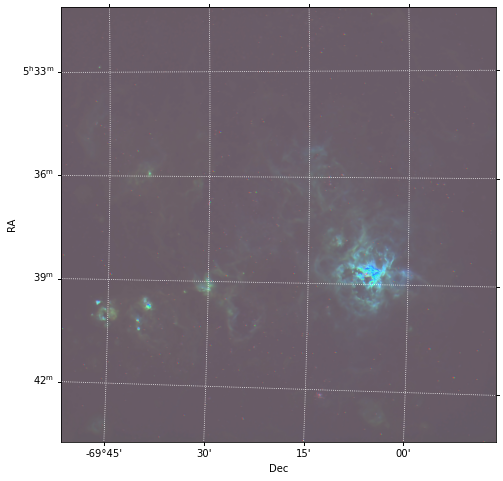

In [31]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
im = ax.imshow(dst, norm=norm, origin='lower')

ax.coords[0].set_ticklabel_position('l')
ax.coords[0].grid(color='white', ls='dotted')
ax.set_ylabel('RA')
ax.coords[1].set_ticklabel_position('b')
ax.coords[1].grid(color='white', ls='dotted')
ax.set_xlabel('Dec');
plt.savefig('salidas/grild_ra_dec.jpg')

### Regiones

Ademas del manejo de las líneas de la cuadrícula, la clase `WCSAxes` se comporta como una instancia normal de `Matplotlib Axes`, y los métodos como `imshow()`, `plot()`, `scatter()`, etc., funcionarán y trazarán los datos en coordenadas de píxeles por defecto.

En el siguiente ejemplo trazaremos los marcadores y el rectángulo en coordenadas de píxeles:

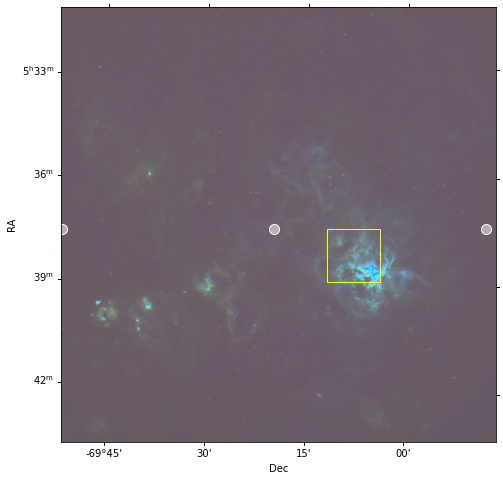

In [32]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
im = ax.imshow(dst, norm=norm, origin='lower')
# La siguiente línea hace que el nivel de zoom ya no cambie, 
# de lo contrario Matplotlib tiene tendencia a alejar el zoom cuando se añaden superposiciones.
ax.set_autoscale_on(False)

# Añadir un rectángulo con la esquina inferior izquierda en la posición de píxel (3000, 3000) con una
# anchura y altura de 100 y 100 píxeles respectivamente.
from matplotlib.patches import Rectangle
r = Rectangle((2500., 1500.), 500., 500., edgecolor='yellow', facecolor='none')
ax.add_patch(r)

# Añade tres marcadores en (40, 30), (100, 130) y (130, 60). 
#El color de la cara es un blanco transparente (0,5 es el valor alfa).
ax.scatter([2000, 0, 4000], [2000, 2000, 2000], s=100, edgecolor='white', facecolor=(1, 1, 1, 0.5))

ax.coords[0].set_ticklabel_position('l')
#ax.coords[0].grid(color='white', ls='dotted')
ax.set_ylabel('RA')
ax.coords[1].set_ticklabel_position('b')
#ax.coords[1].grid(color='white', ls='dotted')
ax.set_xlabel('Dec');

Podemos identificar regiones que queramos destacar de nuestra imagen

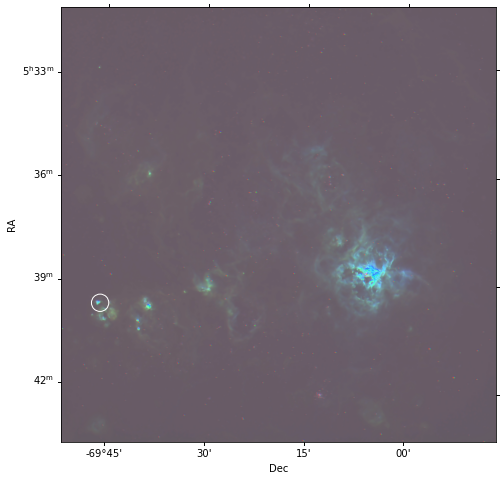

In [33]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
im = ax.imshow(dst, norm=norm, origin='lower')
# La siguiente línea hace que el nivel de zoom ya no cambie, 
# de lo contrario Matplotlib tiene tendencia a alejar el zoom cuando se añaden superposiciones.
ax.set_autoscale_on(False)

#Para el caso especial en el que el WCS representa coordenadas celestes, se pueden pasar otras entradas a get_transform(). Estas son:
ax.scatter(84.92, -69.77, transform=ax.get_transform('fk5'), s=300, edgecolor='white', facecolor='none')

ax.coords[0].set_ticklabel_position('l')
#ax.coords[0].grid(color='white', ls='dotted')
ax.set_ylabel('RA')
ax.coords[1].set_ticklabel_position('b')
#ax.coords[1].grid(color='white', ls='dotted')
ax.set_xlabel('Dec');

### Contornos

El trazado de imágenes como mapas de bits o contornos debe hacerse mediante los métodos habituales de `matplotlib` como `imshow()` o `contour()`. Por ejemplo, continuando con el ejemplo de inicializar ejes con `WCS`, se puede hacer:

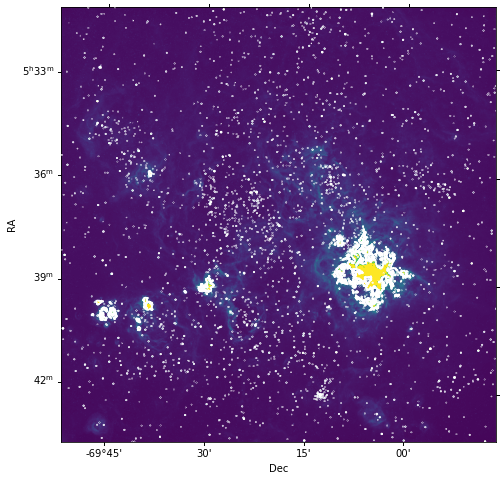

In [34]:
import numpy as np

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
im = ax.imshow(g, vmin=np.min(g), vmax=np.median(g)*2, origin='lower')

# Levels:
# Determina el número y las posiciones de las curvas de nivel / regiones.
# Si es un int n, utiliza MaxNLocator, que intenta elegir automáticamente no más de n+1 niveles de contorno "agradables" entre vmin y vmax.
# Si es un array, dibuja las curvas de nivel en los niveles especificados. Los valores deben estar en orden creciente.

ax.contour(g, transform=ax.get_transform(wcs), levels= [1690,1700], colors='white')

ax.coords[0].set_ticklabel_position('l')
#ax.coords[0].grid(color='white', ls='dotted')
ax.set_ylabel('RA')
ax.coords[1].set_ticklabel_position('b')
#ax.coords[1].grid(color='white', ls='dotted')
ax.set_xlabel('Dec');


### Aplicación de WCS: Alineado de imágenes

Como ejercicio podemos alinear estrellas utilizando las coordenadas `WCS` de nuestras imagenes *H-alpha*, *SII* y *OIII* (que no conseguíamos alinear correctamente antes).

Realizaremos una función en el que podamos introducir el directorio o los valores de las propias imágenes para que me devuelva las imágenes alineadas.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import glob
from astropy import units as u
from astropy.coordinates import SkyCoord
import math
from scipy.ndimage.interpolation import rotate

def shift_image(X, dx, dy):
    ''''
    X: imagen que queremos desplazar
    dx: cantidad de píxeles de desplazamiento en el eje x
    dy: cantidad de píxeles de desplazamiento en el eje x
    return: imagen desplazada en un ndarray
    '''
    X = np.roll(X, dy, axis=0)
    X = np.roll(X, dx, axis=1)
    if dy>0:
        X[:dy, :] = 0
    elif dy<0:
        X[dy:, :] = 0
    if dx>0:
        X[:, :dx] = 0
    elif dx<0:
        X[:, dx:] = 0
    return X

def aling_wcs(directorio):
    ''''
    directorio: donde se encuenrtan las imagenes que queremos alinear, importante solo tener las que queremos alinear.
    return: ndarray con las imagenes alineadas.
    '''
    imagenes_header = []
    imagenes_data = []
    wcs = []
    lista_imagenes = sorted(glob.glob(f"{directorio}*"))
    for imagenes in lista_imagenes:
        hdu = fits.open(imagenes)
        imagenes_header.append(hdu[0].header)  
        imagenes_data.append(hdu[0].data)
        wcs.append(WCS(header=hdu[0].header))
        hdu.close()
    
    ra_centro_ref = imagenes_header[0]['CRVAL1']*u.degree 
    dec_centro_ref = imagenes_header[0]['CRVAL2']*u.degree
    
    centro_imagen_ref = SkyCoord(ra_centro_ref ,dec_centro_ref , frame='icrs')    
    
    x_centro = []
    y_centro = []
    for imagen in range(len(lista_imagenes)):
        x_centro.append(wcs[imagen].world_to_pixel(centro_imagen_ref)[0])
        y_centro.append(wcs[imagen].world_to_pixel(centro_imagen_ref)[1])
    dx = []
    dy = []
    for imagen in range(len(lista_imagenes)):
        dx.append(round(x_centro[0] - x_centro[imagen]))
        dy.append(round(y_centro[0] - y_centro[imagen]))
    
    imagenes_desplazadas = []    
    for imagen in range(len(lista_imagenes)):
        imagenes_desplazadas.append(shift_image(imagenes_data[imagen], dx[imagen], dy[imagen]))
    
    sky = wcs[0].pixel_to_world(0, 0)
    x_cero = []
    y_cero = []
    for imagen in range(len(lista_imagenes)):
        x_cero.append(wcs[imagen].world_to_pixel(sky)[0])
        y_cero.append(wcs[imagen].world_to_pixel(sky)[1])
    angulo = [] # defino una lista vacia en la que voy a tener en cuenta el angulo de rotacion que hay que aplicar a cada imagen
    
    for i in range(len(lista_imagenes)):
        #angulo.append(math.degrees(math.atan2(y[i][1] - y[i][0], x[i][1] - x[i][0]))) # calculo el angulo entre dos puntos de la misma imagen
        angulo.append(round(math.degrees(math.atan2(y_cero[i] - y_centro[i], x_cero[i] - x_centro[i])))) # calculo el angulo entre dos puntos de la misma imagen
        
    imagenes_derotadas = [imagenes_desplazadas[0], ] # aquí uso la funcion rotate(imagen, angulo_de_rotacion) de la biblioteca scipy
    for i in range(1,len(lista_imagenes)):
            imagenes_derotadas.append(rotate(imagenes_desplazadas[i], angle=angulo[0]-angulo[i]))
            print(f"La imagen {i} está rotada {angulo[0]-angulo[i]} grados")
    return imagenes_desplazadas

In [36]:
directorio = 'salidas/salidaCalibracion/sho/'
h, o, s = aling_wcs(directorio)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


La imagen 1 está rotada 0 grados
La imagen 2 está rotada 0 grados


In [37]:
rgb_default = make_lupton_rgb(s, h, o,Q=1,stretch=3000,filename="salidas/salidaCalibracion/shoTarantula.jpg")

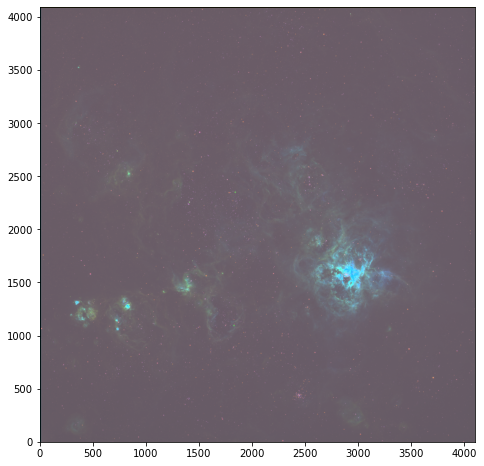

In [38]:
plt.figure(figsize=(8, 8))
plt.imshow(rgb_default, origin='lower', norm=norm)
plt.show()

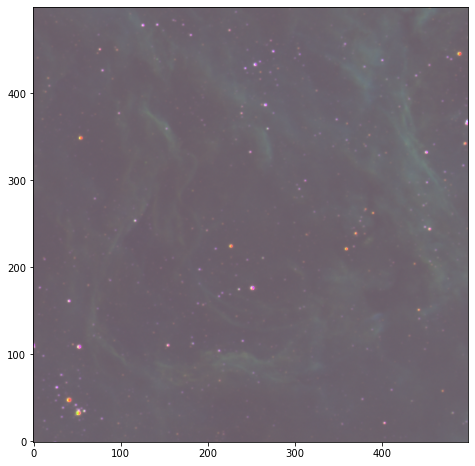

In [39]:
plt.figure(figsize=(8, 8))
plt.imshow(rgb_default[2000:2500,2000:2500], origin='lower', norm=norm)
plt.show()